In [2]:
with open('linear_regression_data1.txt') as f:
    a = f.readlines()
    f.close()
x = []
y = []
for _ in a:
    h = _.split(',')
    x.append(float(h[0]))
    y.append(float(h[1])) 
m = len(y)

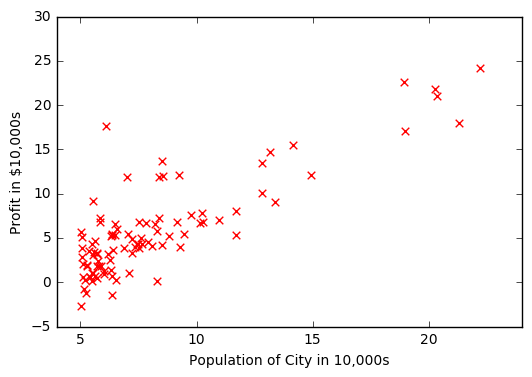

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x, y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [4]:
# 构建线性回归模型
# 因为只有一个特征输入 x 和一个输出 y
# y = w*x + b


In [5]:
def computerCost(x,y,w,b):
    #MSE 均方误差
    J = 0
    h = [(s * w + b) for s in x]
    J = sum([(hi - yi)**2 for hi,yi in zip(h,y)]) * 1.0 / (2 * m)
    return J
print(computerCost(x,y,0,0))

32.072733877455654


h是关于w 和 b的函数$$ h = wx+b$$

$$\frac{(h-y)^2}{2m}$$

由链式求导法则，先对h求导：
$$\frac{(h-y)}{m}$$
再对w求导得到：
$$\frac{(h-y)x}{m}$$
对b 求导得到：
$$\frac{(h-y)}{m}$$


In [145]:
# 梯度下降
def gradientDescent(x,y,w,b,lr=0.01,num_iters=1500):

    J_history = list(range(num_iters))
    w_history = list(range(num_iters))
    for i in range(num_iters):
        h  = [(s * w + b) for s in x]
        
        w = w- lr * (1.0/m)*sum([ii * (hi - yi) for ii,hi,yi in zip(x,h,y)])
        b -= lr  * (1.0/m)*sum([(hi - yi) for hi,yi in zip(h,y) ])
        w_history[i] = w
        J_history[i] = computerCost(x,y,w,b)
    return(w,b,J_history,w_history)


In [126]:
# 梯度法 + 动量
def sgd_momentum(x,y,w,b,mom=0.9,vw=0,vb=0,lr=0.01,num_iters=1500):
    J_history = list(range(num_iters))
    w_history = list(range(num_iters))
    for i in range(num_iters):
        h  = [(s * w + b) for s in x]
        
        vw = mom * vw +  lr * (1.0/m)*sum([ii * (hi - yi) for ii,hi,yi in zip(x,h,y)])
        w -= vw
        
        vb = mom * vb + lr  * (1.0/m)*sum([(hi - yi) for hi,yi in zip(h,y) ])
        b -= vb
        w_history[i] = w
        J_history[i] = computerCost(x,y,w,b)
    return(w,b,J_history,w_history)

In [148]:
# Adagrad算法
from math import sqrt

def adagrad(x,y,w,b,sw=0,sb=0,lr=0.9,num_iters=1500):
    eps_stable = 1e-7
    J_history = list(range(num_iters))
    w_history = list(range(num_iters))
    for i in range(num_iters):
        h  = [(s * w + b) for s in x]
        gw = (1.0/m)*sum([ii * (hi - yi) for ii,hi,yi in zip(x,h,y)])
        gb = (1.0/m)*sum([(hi - yi) for hi,yi in zip(h,y) ])
        sw += gw**2
        sb += gb**2
        divw = lr * gw / sqrt(sw + eps_stable)
        divb = lr * gb / sqrt(sb + eps_stable)
        w -= divw
        b -= divb
        w_history[i] = w
        J_history[i] = computerCost(x,y,w,b)
    return(w,b,J_history,w_history)      

In [177]:
# RMSProp算法
def rmsprop(x,y,w,b,gamma=0.999,sw=0,sb=0,lr=0.3,num_iters=10):
    eps_stable = 1e-7
    J_history = list(range(num_iters))
    w_history = list(range(num_iters))
    for i in range(num_iters):
        h  = [(s * w + b) for s in x]
        gw = (1.0/m)*sum([ii * (hi - yi) for ii,hi,yi in zip(x,h,y)])
        gb = (1.0/m)*sum([(hi - yi) for hi,yi in zip(h,y) ])
        sw = gamma * sw + (1.0 - gamma) * (gw**2)
        sb = gamma * sb + (1.0 - gamma) * (gb**2)
        divw = lr * gw / sqrt(sw + eps_stable) 
        divb = lr * gb / sqrt(sb + eps_stable)
        
        w -= divw
        b -= divb
        w_history[i] = w
        J_history[i] = computerCost(x,y,w,b)
    return(w,b,J_history,w_history)    

In [206]:
#Adadelta算法
from math import sqrt
def adadelta(x,y,w,b,deltaw=0,deltab=0,sw=0,sb=0,rho=0.9999,num_iters=1500):
    eps_stable = 1e-5
    J_history = list(range(num_iters))
    w_history = list(range(num_iters))  
    for i in range(num_iters):
        h  = [(s * w + b) for s in x]
        gw = (1.0/m)*sum([ii * (hi - yi) for ii,hi,yi in zip(x,h,y)])
        gb = (1.0/m)*sum([(hi - yi) for hi,yi in zip(h,y) ])
        sw = rho * sw + (1.0 - rho) * (gw**2)
        sb = rho * sb + (1.0 - rho) * (gb**2)
        divw = sqrt(deltaw + eps_stable) * gw / sqrt(sw + eps_stable) 
        divb = sqrt(deltab + eps_stable) * gb / sqrt(sb + eps_stable)
        deltaw = rho * deltaw + (1-rho)*(divw**2)
        deltab = rho * deltab + (1-rho)*(divb**2)
        #print(divw,divb)
        w -= divw
        b -= divb
        w_history[i] = w
        J_history[i] = computerCost(x,y,w,b)
    return(w,b,J_history,w_history)    

In [212]:
# Adam 算法
from math import sqrt
def adam(x,y,w,b,sw=0,sb=0,vw=0,vb=0,lr=0.1,t=0,num_iters=1500):
    beta1 = 0.9
    beta2 = 0.999
    eps_stable = 1e-8
    J_history = list(range(num_iters))
    w_history = list(range(num_iters))  
    for i in range(num_iters):
        t += 1
        h  = [(s * w + b) for s in x]
        gw = (1.0/m)*sum([ii * (hi - yi) for ii,hi,yi in zip(x,h,y)])
        gb = (1.0/m)*sum([(hi - yi) for hi,yi in zip(h,y) ])
        vw = beta1*vw + (1. - beta1)*gw
        vb = beta1*vb + (1. - beta1)*gb
        sw = beta2 * sw + (1. - beta2)*(gw**2)
        sb = beta2 * sb + (1. - beta2)*(gb**2)
        vw_bias_corr = vw/(1.- beta1**t)
        vb_bias_corr = vb/(1. - beta1**t )
        sw_bias_corr = sw/(1.- beta2**t)
        sb_bias_corr = sb/(1.- beta2**t)
        divw = lr * vw_bias_corr/(sqrt(sw_bias_corr+eps_stable))
        divb = lr * vb_bias_corr/(sqrt(sb_bias_corr+eps_stable))
        w -= divw
        b -= divb
        w_history[i] = w
        J_history[i] = computerCost(x,y,w,b)
    return(w,b,J_history,w_history)    

In [107]:
w,b,Cost_J,w_his = gradientDescent(x,y,0,0)
print(w,b,Cost_J[-1])

1.1912611946381648 -3.8781376908655907 4.476999714912216


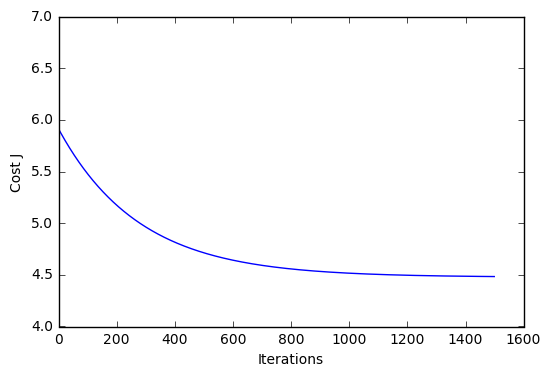

In [147]:
Cost_J = gradientDescent(x,y,0,0)[2]
#Cost_Mom_J = sgd_momentum(x,y,0,0)[2]
#w_history = gradientDescent(x,y,0,0)[3]
plt.plot(list(range(len(Cost_J))),Cost_J)
#plt.plot(list(range(len(Cost_Mom_J))),Cost_Mom_J)
#plt.xlim(0,200)
#plt.ylim(4.5,15)
plt.ylabel('Cost J')
plt.xlabel('Iterations')
plt.show()

In [108]:
w,b,Cost_J,w_his = sgd_momentum(x,y,0,0)
print(w,b,Cost_J[-1])

1.1930336441895932 -3.895780878311852 4.476971375975178


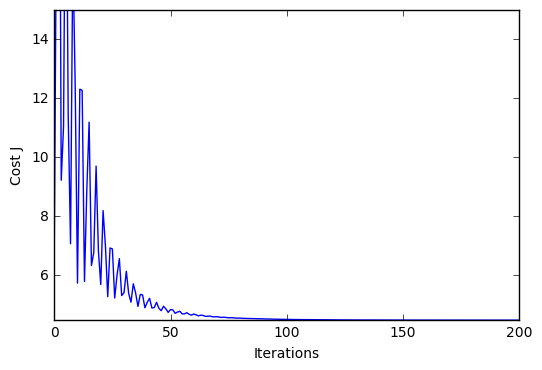

In [127]:
#Cost_J = gradientDescent(x,y,0,0)[2]
Cost_Mom_J = sgd_momentum(x,y,0,0)[2]
#w_history = gradientDescent(x,y,0,0)[3]
#plt.plot(list(range(len(w_history))),w_history)
plt.plot(list(range(len(Cost_Mom_J))),Cost_Mom_J)
plt.ylim(4.5,15)
plt.xlim(0,200)
plt.ylabel('Cost J')
plt.xlabel('Iterations')
plt.show()

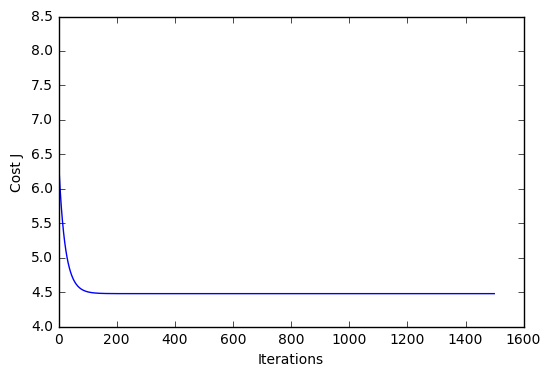

In [141]:
Cost_J = adagrad(x,y,0,0)[2]
#Cost_Mom_J = sgd_momentum(x,y,0,0)[2]
#w_history = gradientDescent(x,y,0,0)[3]
plt.plot(list(range(len(Cost_J))),Cost_J)
#plt.plot(list(range(len(Cost_Mom_J))),Cost_Mom_J)
#plt.xlim(0,200)
#plt.ylim(4.5,15)
plt.ylabel('Cost J')
plt.xlabel('Iterations')
plt.show()

-9.48683286936236 -9.486819068386778
9.454129066423583 9.462338114425624
-0.7509572548322374 -0.6464396839479805
0.04737446996139908 0.14294638288335823
-0.013045030934194412 0.08126038868653022
-0.008249586882413472 0.084236233840527
-0.0084440550840108 0.08230001576485398
-0.008257527557567656 0.0807735296925315
-0.008103707839006446 0.07924623753170111
-0.00795044570304018 0.07774942009701405


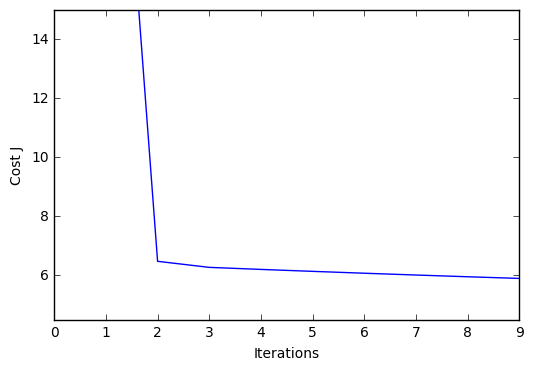

In [178]:
Cost_J = rmsprop(x,y,0,0)[2]
#Cost_Mom_J = sgd_momentum(x,y,0,0)[2]
#w_history = gradientDescent(x,y,0,0)[3]
plt.plot(list(range(len(Cost_J))),Cost_J)
#plt.plot(list(range(len(Cost_Mom_J))),Cost_Mom_J)
#plt.xlim(0,200)
plt.ylim(4.5,15)
plt.ylabel('Cost J')
plt.xlabel('Iterations')
plt.show()

1.1930336401835195 -3.8957808392430406


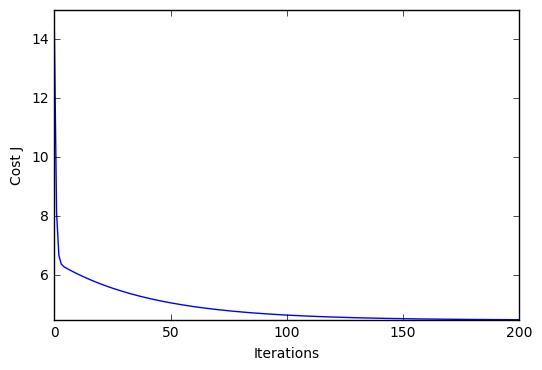

In [209]:
print(adadelta(x,y,0,0)[0],adadelta(x,y,0,0)[1])
Cost_J = adadelta(x,y,0,0)[2]
#Cost_Mom_J = sgd_momentum(x,y,0,0)[2]
#w_history = gradientDescent(x,y,0,0)[3]
plt.plot(list(range(len(Cost_J))),Cost_J)
#plt.plot(list(range(len(Cost_Mom_J))),Cost_Mom_J)
plt.xlim(0,200)
plt.ylim(4.5,15)
plt.ylabel('Cost J')
plt.xlabel('Iterations')
plt.show()

1.1930336441895937 -3.8957808783118546


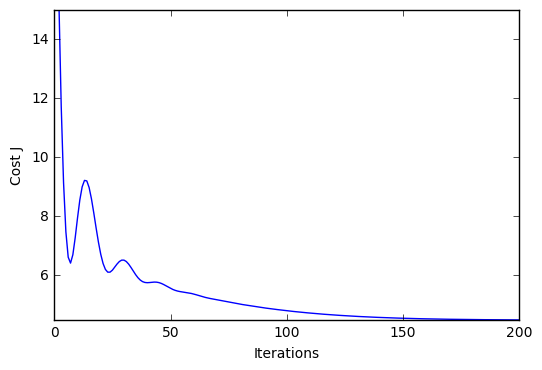

In [213]:
print(adam(x,y,0,0)[0],adam(x,y,0,0)[1])
Cost_J = adam(x,y,0,0)[2]
#Cost_Mom_J = sgd_momentum(x,y,0,0)[2]
#w_history = gradientDescent(x,y,0,0)[3]
plt.plot(list(range(len(Cost_J))),Cost_J)
#plt.plot(list(range(len(Cost_Mom_J))),Cost_Mom_J)
plt.xlim(0,200)
plt.ylim(4.5,15)
plt.ylabel('Cost J')
plt.xlabel('Iterations')
plt.show()

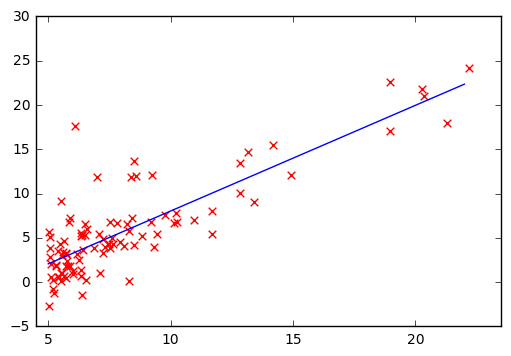

In [106]:
import numpy as np

xx = np.arange(5,23)

yy = [w * x_ + b for x_ in xx]
plt.xlim(4.5,23.5)
# 画出我们自己写的线性回归梯度下降收敛的情况
plt.scatter(x, y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

plt.show()